# Análisis Exploratorio de Datos (EDA)

## Dataset 1: Detección de Anomalías en Consumo Eléctrico
<br>

**Objetivo:** Explorar y analizar el dataset de uso eléctrico anormal para prepararlo para un modelo de detección de anomalías.

**Dataset:** Intelligent Abnormal Electricity Usage Dataset (REALWORLD)

**Fuente:** Kaggle


## 1. Importar las librerías necesarias

In [40]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Cargar el dataset

In [41]:
# Cargar el dataset
df = pd.read_csv('../data/Intelligent_abnormal_electricity_usage_dataset_REALWORLD.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0


## 3. Inspección inicial del dataset

### 3.1 Dimensiones y estructura

In [42]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"  - Número de filas: {df.shape[0]}")
print(f"  - Número de columnas: {df.shape[1]}")

Dimensiones del dataset: (10800, 15)
  - Número de filas: 10800
  - Número de columnas: 15


In [43]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Meter_Id                 10800 non-null  object 
 1   Date                     10800 non-null  object 
 2   Region_Code              10800 non-null  object 
 3   Dwelling_Type            10800 non-null  object 
 4   Num_Occupants            10800 non-null  int64  
 5   House_Area (sqft)        10800 non-null  int64  
 6   Appliance_Score          10800 non-null  int64  
 7   Connected_Load(kw)       10800 non-null  float64
 8   Temperature_C            10800 non-null  float64
 9   Humidity (%)             10800 non-null  float64
 10  Expected_Energy(kwh)     10133 non-null  object 
 11  Actual_Energy(kwh)       9900 non-null   object 
 12  Usage_Deviation(%)       10800 non-null  float64
 13  Cluster_Avg_Energy(kwh)  10800 non-null  f

In [44]:
# Nombres de las columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['Meter_Id', 'Date', 'Region_Code', 'Dwelling_Type', 'Num_Occupants', 'House_Area (sqft)', 'Appliance_Score', 'Connected_Load(kw)', 'Temperature_C', 'Humidity (%)', 'Expected_Energy(kwh)', 'Actual_Energy(kwh)', 'Usage_Deviation(%)', 'Cluster_Avg_Energy(kwh)', 'Abnormal_Usage']


### 3.2 Tipos de datos

In [45]:
# Tipos de datos de cada columna
print("Tipos de datos:")
print(df.dtypes)

# Separar columnas por tipo
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumnas numéricas ({len(numericas)}): {numericas}")
print(f"\nColumnas categóricas ({len(categoricas)}): {categoricas}")

Tipos de datos:
Meter_Id                    object
Date                        object
Region_Code                 object
Dwelling_Type               object
Num_Occupants                int64
House_Area (sqft)            int64
Appliance_Score              int64
Connected_Load(kw)         float64
Temperature_C              float64
Humidity (%)               float64
Expected_Energy(kwh)        object
Actual_Energy(kwh)          object
Usage_Deviation(%)         float64
Cluster_Avg_Energy(kwh)    float64
Abnormal_Usage               int64
dtype: object

Columnas numéricas (9): ['Num_Occupants', 'House_Area (sqft)', 'Appliance_Score', 'Connected_Load(kw)', 'Temperature_C', 'Humidity (%)', 'Usage_Deviation(%)', 'Cluster_Avg_Energy(kwh)', 'Abnormal_Usage']

Columnas categóricas (6): ['Meter_Id', 'Date', 'Region_Code', 'Dwelling_Type', 'Expected_Energy(kwh)', 'Actual_Energy(kwh)']


### 3.3 Primeras y últimas observaciones

In [46]:
# Primeras 10 filas
print("Primeras 10 filas:")
df.head(10)

Primeras 10 filas:


,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0
5,IN-KL-ELC-89330274,06-01-2023,IN_KL_ERN,Independent House,2,2501,18,6.94,28.45,61.15,16.51 kWh,15.79 kWh,-4.36,16.43,0
6,IN-KL-ELC-13794510,05-01-2023,IN_KL_TVM,Independent House,5,2791,20,4.67,29.76,72.91,19.13 kWh,NaN,49.34,16.89,1
7,IN-KL-ELC-27773185,25-01-2023,IN_KL_ALP,Apartment,6,2752,17,5.14,32.56,47.77,20.36 kWh,27.40876897292889 kWh,34.62,16.47,1
8,IN-KL-ELC-52308792,10-01-2023,IN_KL_ERN,Independent House,5,1614,17,6.43,22.80,64.85,17.37 kWh,17.8 kWh,2.48,16.43,0
9,IN-KL-ELC-55367153,04-01-2023,IN_KL_TVM,Independent House,1,490,12,6.27,34.75,69.76,14.14 kWh,14.08 kWh,-0.42,16.89,0


In [47]:
# Últimas 10 filas
print("Últimas 10 filas:")
df.tail(10)

Últimas 10 filas:


,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
10790,IN-KL-ELC-56920957,13-01-2023,IN_KL_ERN,Apartment,1,2256,13,5.17,34.24,66.72,13.54 kWh,14.24 kWh,5.17,16.61,0
10791,IN-KL-ELC-64375065,29-01-2023,IN_KL_ERN,Apartment,3,828,6,6.29,32.26,73.98,13.77 kWh,13.12 kWh,-4.72,16.61,0
10792,IN-KL-ELC-11027367,17-01-2023,IN_KL_ALP,Villa,3,2649,14,3.90,22.00,62.57,12.61 kWh,19.459200169168337 kWh,54.32,16.26,1
10793,IN-KL-ELC-86586193,17-01-2023,IN_KL_ERN,Independent House,1,1121,11,3.94,33.94,64.37,11.76 kWh,19.045382653509357 kWh,61.95,16.43,1
10794,IN-KL-ELC-88593759,26-01-2023,IN_KL_ERN,Villa,2,2287,13,7.17,29.73,53.20,15.27 kWh,23.354450715418814 kWh,52.94,16.28,1
10795,IN-KL-ELC-11063908,05-01-2023,IN_KL_ALP,Apartment,4,1364,9,7.04,32.65,47.38,16.67 kWh,NaN,-5.82,16.47,1
10796,IN-KL-ELC-66129276,02-01-2023,IN_KL_ALP,Apartment,3,2673,21,6.26,25.62,48.69,17.33 kWh,23.56399654189783 kWh,35.97,16.47,1
10797,IN-KL-ELC-79975445,21-01-2023,IN_KL_ERN,Villa,5,2520,15,6.56,27.33,67.33,18.11 kWh,20.7 kWh,14.30,16.28,0
10798,IN-KL-ELC-90825900,21-01-2023,IN_KL_ALP,Independent House,3,2379,14,4.54,34.11,70.00,15.72 kWh,14.46 kWh,-8.02,17.83,0
10799,IN-KL-ELC-20063517,11-01-2023,IN_KL_TVM,Independent House,6,2560,21,4.08,25.73,73.94,18.91 kWh,19.02 kWh,0.58,16.89,0


## 4. Análisis de Valores Faltantes

In [48]:
# Contar valores faltantes por columna
print("Valores faltantes por columna:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores_Faltantes': missing,
    'Porcentaje': missing_pct
})

# Mostrar solo columnas con valores faltantes
missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=False)

Valores faltantes por columna:


,Valores_Faltantes,Porcentaje
Actual_Energy(kwh),900,8.333333
Expected_Energy(kwh),667,6.175926


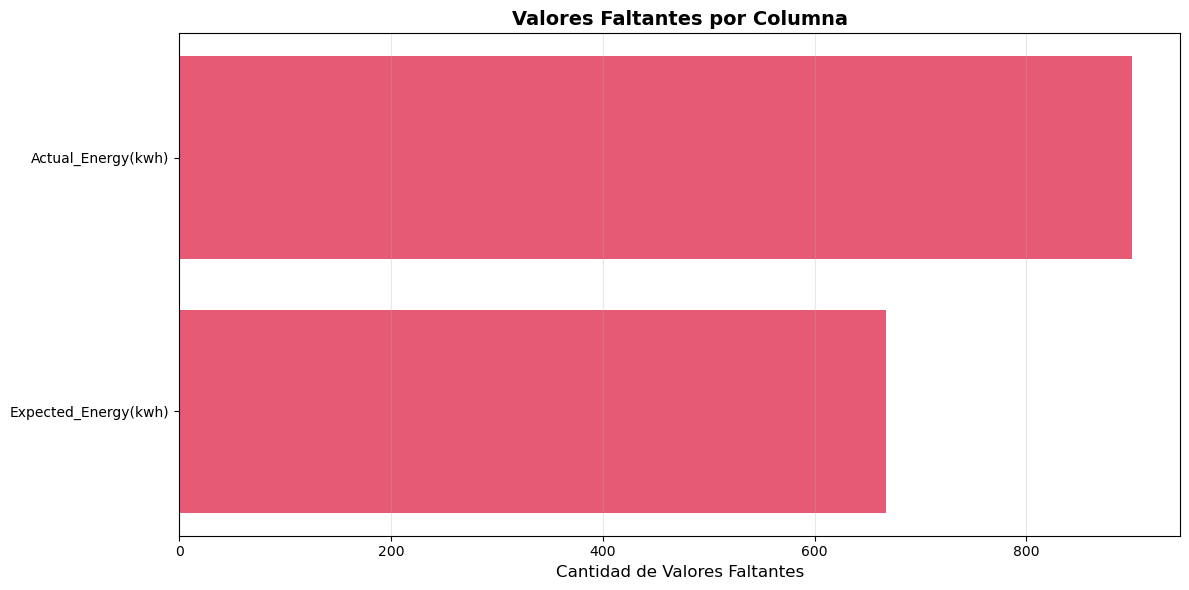

In [49]:
# Visualizar valores faltantes
plt.figure(figsize=(12, 6))
missing_cols = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=True)

if len(missing_cols) > 0:
    plt.barh(missing_cols.index, missing_cols['Valores_Faltantes'], color='crimson', alpha=0.7)
    plt.xlabel('Cantidad de Valores Faltantes', fontsize=12)
    plt.title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("¡No hay valores faltantes en el dataset!")

## 5. Estadísticas Descriptivas

### 5.1 Variables numéricas

In [50]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas (variables numéricas):")
df.describe()

Estadísticas descriptivas (variables numéricas):


,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,3.527778,1673.255556,13.508333,5.314472,29.954353,64.754650,15.802278,16.775722,0.438796
std,1.701159,708.161742,4.731902,1.546343,3.992592,11.491137,26.914769,0.499606,0.496263
min,1.000000,450.000000,6.000000,2.510000,12.870000,45.000000,-37.240000,16.020000,0.000000
25%,2.000000,1003.250000,9.000000,3.920000,27.307500,54.777500,-2.492500,16.430000,0.000000
50%,4.000000,1775.500000,14.000000,5.335000,29.970000,64.525000,4.025000,16.610000,0.000000
75%,5.000000,2279.500000,18.000000,6.662500,32.650000,74.632500,33.000000,16.982500,1.000000
max,6.000000,2795.000000,21.000000,7.980000,45.250000,85.000000,134.610000,17.830000,1.000000


In [51]:
# Estadísticas adicionales
print("\nEstadísticas adicionales:")
print(f"\nMedianas:")
print(df.select_dtypes(include=[np.number]).median())

print(f"\nModa:")
print(df.select_dtypes(include=[np.number]).mode().iloc[0])


Estadísticas adicionales:

Medianas:
Num_Occupants                 4.000
House_Area (sqft)          1775.500
Appliance_Score              14.000
Connected_Load(kw)            5.335
Temperature_C                29.970
Humidity (%)                 64.525
Usage_Deviation(%)            4.025
Cluster_Avg_Energy(kwh)      16.610
Abnormal_Usage                0.000
dtype: float64

Moda:
Num_Occupants                 4.00
House_Area (sqft)          2725.00
Appliance_Score              21.00
Connected_Load(kw)            4.08
Temperature_C                27.72
Humidity (%)                 47.10
Usage_Deviation(%)            0.00
Cluster_Avg_Energy(kwh)      16.43
Abnormal_Usage                0.00
Name: 0, dtype: float64


### 5.2 Variables categóricas

In [52]:
# Analizar variables categóricas
print("Análisis de variables categóricas:")
for col in categoricas:
    print(" ")
    print(f"Columna: {col}")
    print(" ")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"\nDistribución:")
    print(df[col].value_counts())
    print(f"\nPorcentajes:")
    print(df[col].value_counts(normalize=True) * 100)

Análisis de variables categóricas:
 
Columna: Meter_Id
 
Valores únicos: 360

Distribución:
Meter_Id
IN-KL-ELC-97400511    30
IN-KL-ELC-28113115    30
IN-KL-ELC-17499006    30
IN-KL-ELC-22187937    30
IN-KL-ELC-57403818    30
                      ..
IN-KL-ELC-85575226    30
IN-KL-ELC-45560016    30
IN-KL-ELC-87381788    30
IN-KL-ELC-29028684    30
IN-KL-ELC-85713070    30
Name: count, Length: 360, dtype: int64

Porcentajes:
Meter_Id
IN-KL-ELC-97400511    0.277778
IN-KL-ELC-28113115    0.277778
IN-KL-ELC-17499006    0.277778
IN-KL-ELC-22187937    0.277778
IN-KL-ELC-57403818    0.277778
                        ...   
IN-KL-ELC-85575226    0.277778
IN-KL-ELC-45560016    0.277778
IN-KL-ELC-87381788    0.277778
IN-KL-ELC-29028684    0.277778
IN-KL-ELC-85713070    0.277778
Name: proportion, Length: 360, dtype: float64
 
Columna: Date
 
Valores únicos: 30

Distribución:
Date
25-01-2023    360
04-01-2023    360
21-01-2023    360
28-01-2023    360
06-01-2023    360
05-01-2023    360
10-01-2023

## 6. Análisis de la Variable Objetivo

In [53]:
# Distribución de la variable objetivo (Abnormal_Usage)
print("Distribución de Abnormal_Usage:")
target_counts = df['Abnormal_Usage'].value_counts().sort_index()
print(target_counts)

print(f"\nPorcentajes:")
target_pct = df['Abnormal_Usage'].value_counts(normalize=True).sort_index() * 100
print(target_pct)

print(f"\nBalance de clases:")
print(f"  - Clase 0 (Normal): {target_pct[0]:.2f}%")
print(f"  - Clase 1 (Anómalo): {target_pct[1]:.2f}%")

Distribución de Abnormal_Usage:
Abnormal_Usage
0    6061
1    4739
Name: count, dtype: int64

Porcentajes:
Abnormal_Usage
0    56.12037
1    43.87963
Name: proportion, dtype: float64

Balance de clases:
  - Clase 0 (Normal): 56.12%
  - Clase 1 (Anómalo): 43.88%


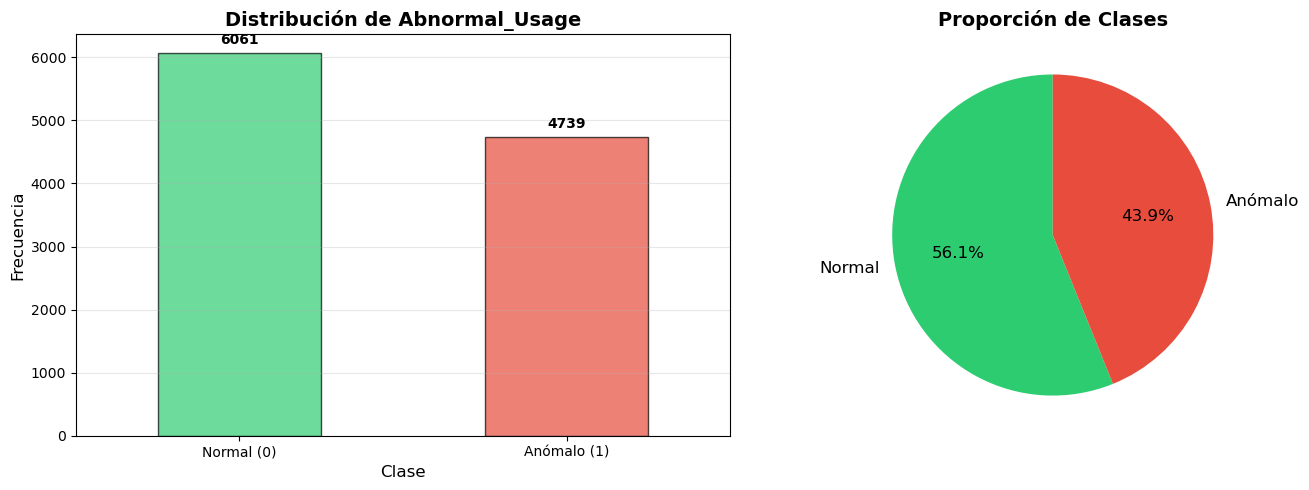

In [54]:
# Visualizar distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Abnormal_Usage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticklabels(['Normal (0)', 'Anómalo (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico circular
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts.values, labels=['Normal', 'Anómalo'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Visualización de Datos Univariables

### 7.1 Histogramas de variables numéricas

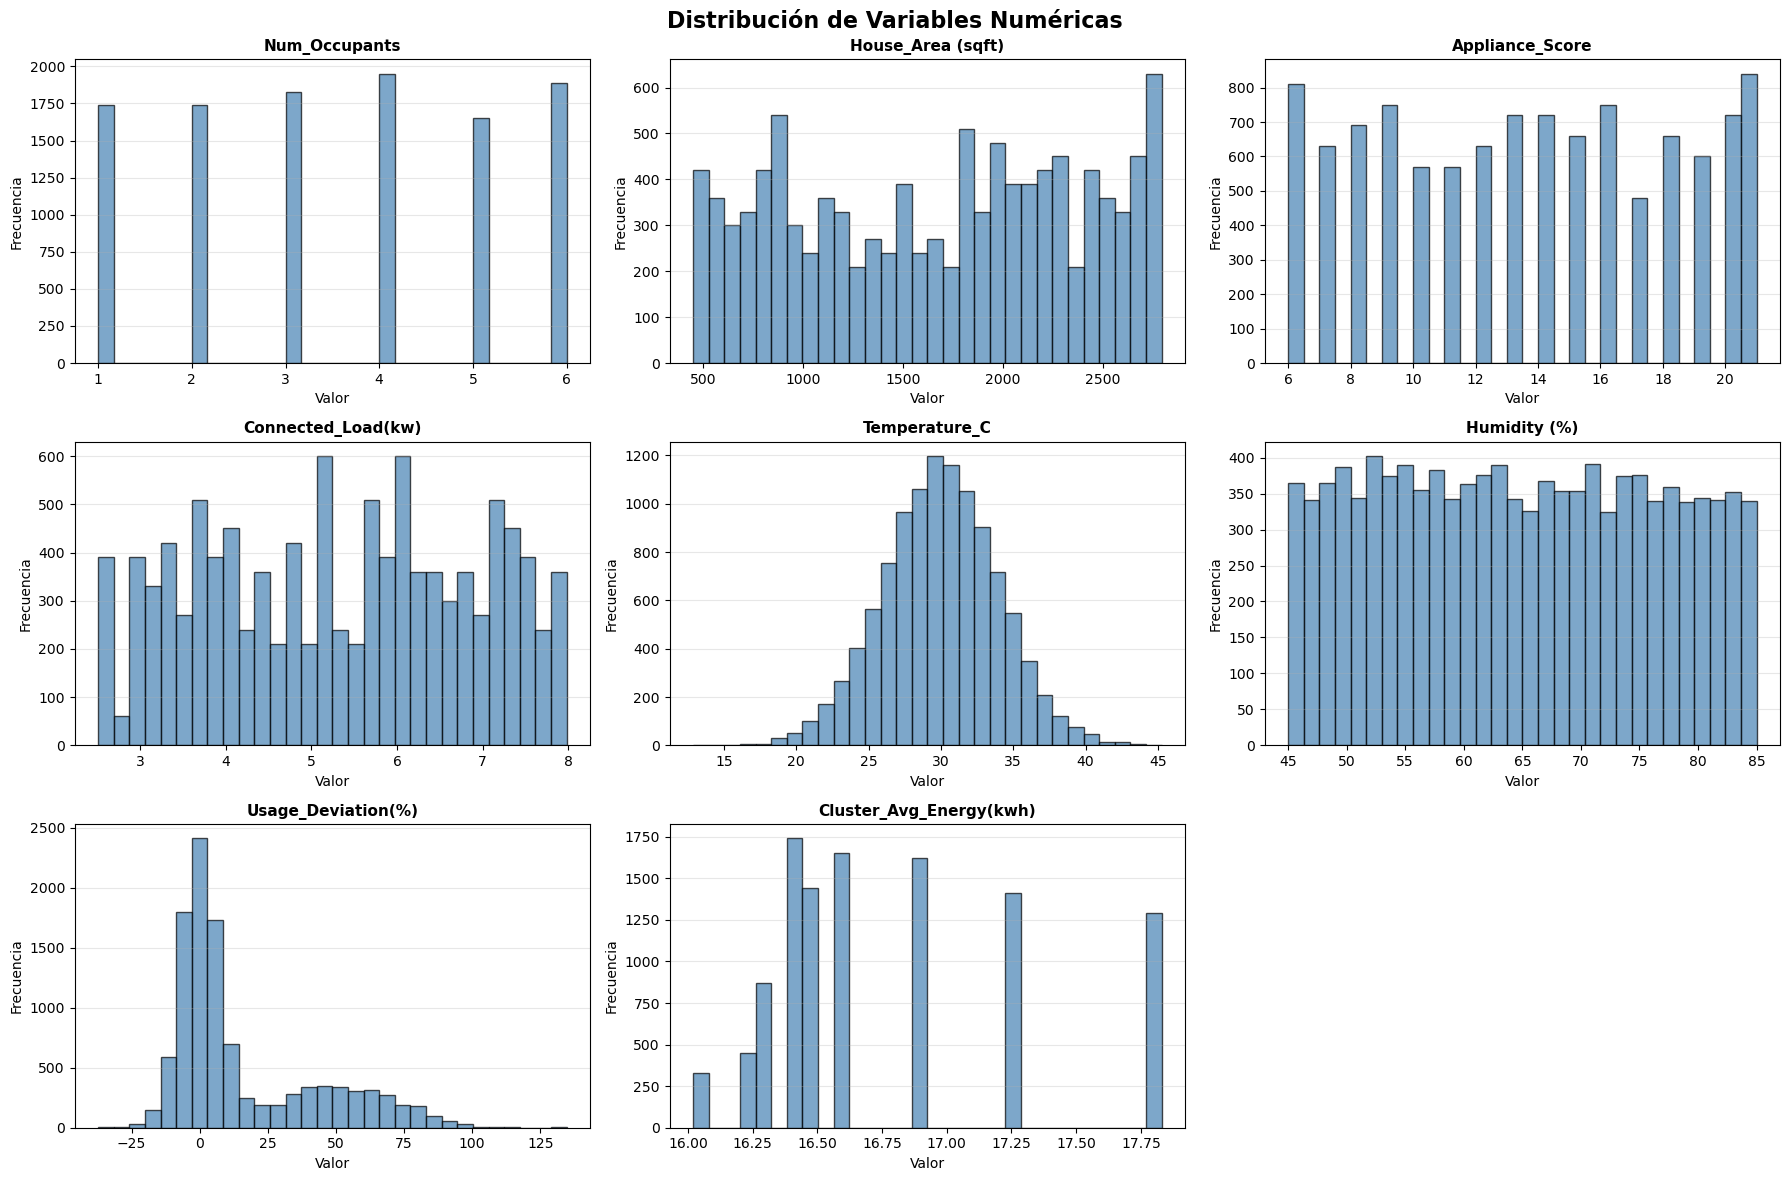

In [55]:
# Seleccionar variables numéricas (excluyendo las de energía que tienen formato incorrecto)
numeric_cols = ['Num_Occupants', 'House_Area (sqft)', 'Appliance_Score', 
                'Connected_Load(kw)', 'Temperature_C', 'Humidity (%)', 
                'Usage_Deviation(%)', 'Cluster_Avg_Energy(kwh)']

# Crear histogramas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(col, fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valor', fontsize=10)
        axes[idx].set_ylabel('Frecuencia', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Ocultar el último subplot vacío
axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 7.2 Gráficos de cajas (Boxplots)

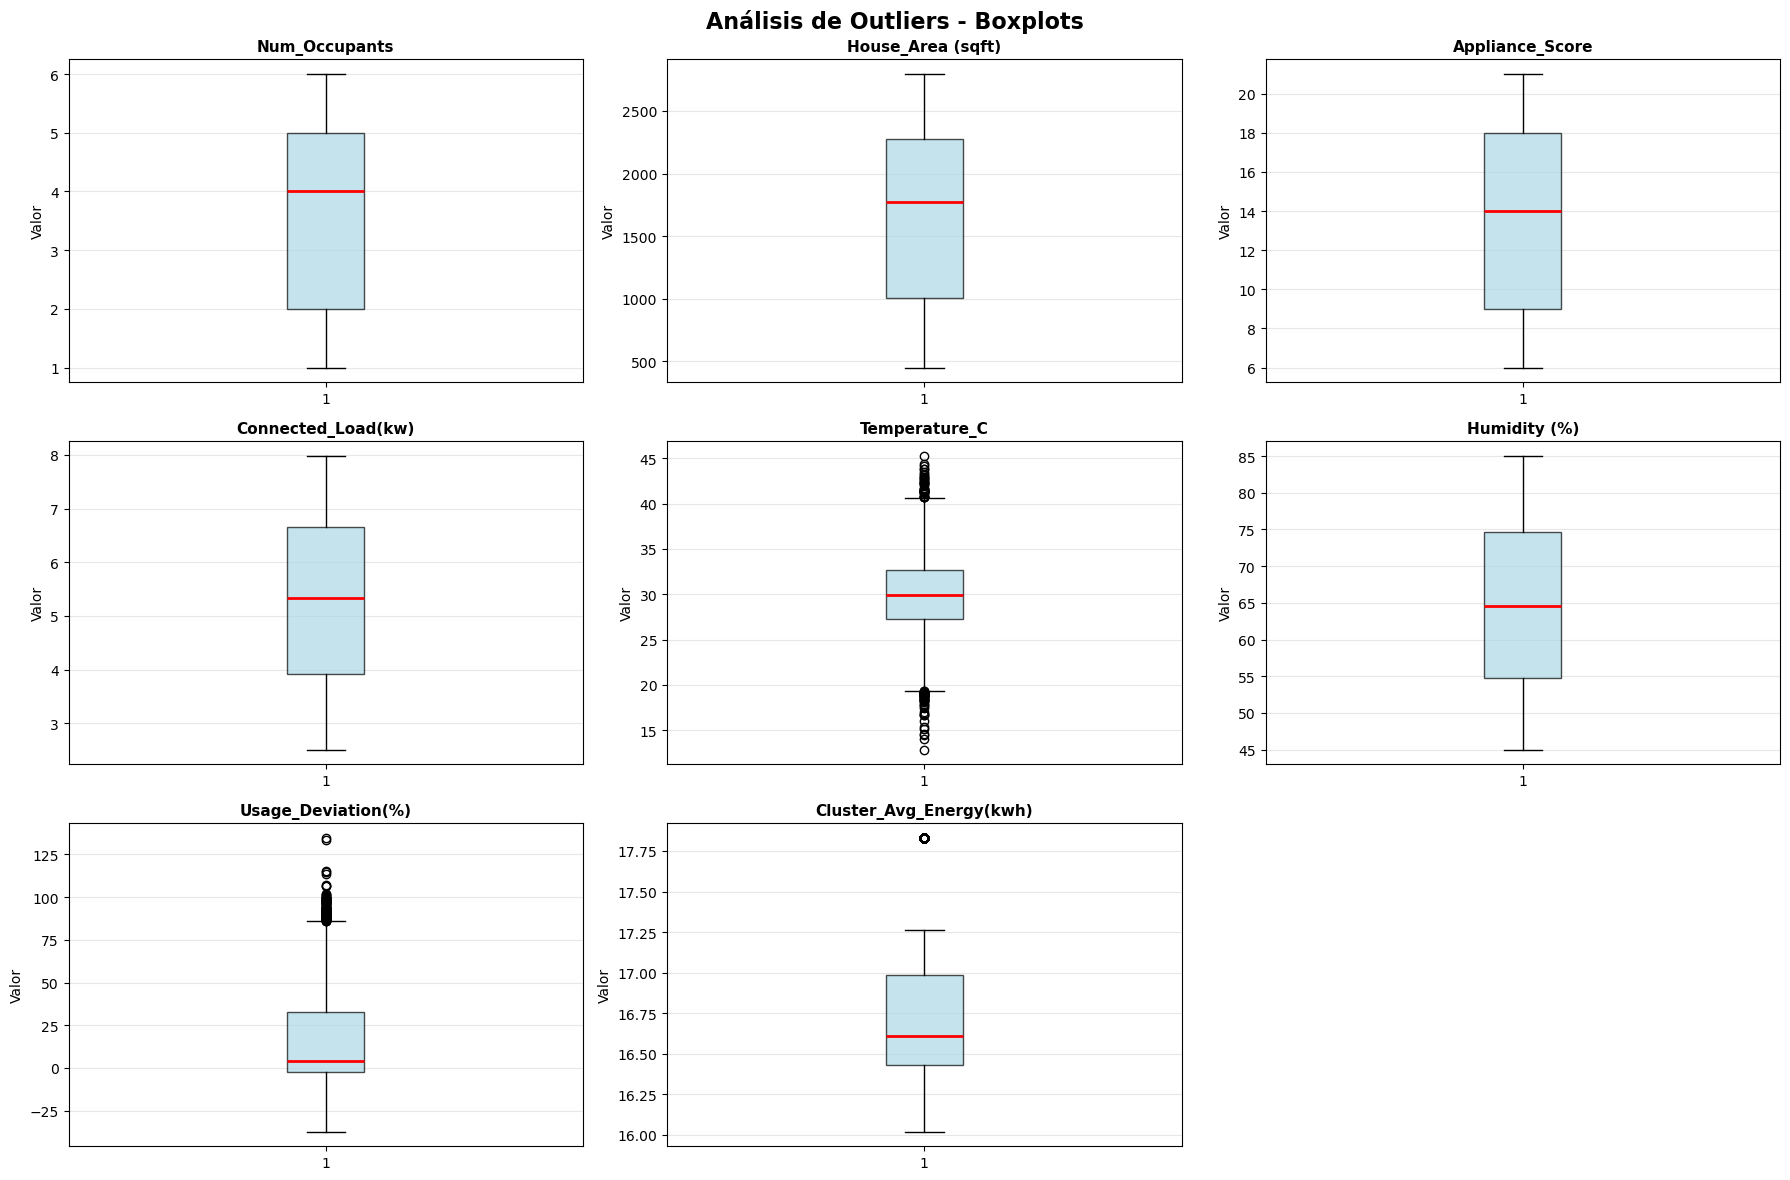

In [56]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Análisis de Outliers - Boxplots', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if col in df.columns:
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(col, fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valor', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 7.3 Gráficos de densidad (KDE)

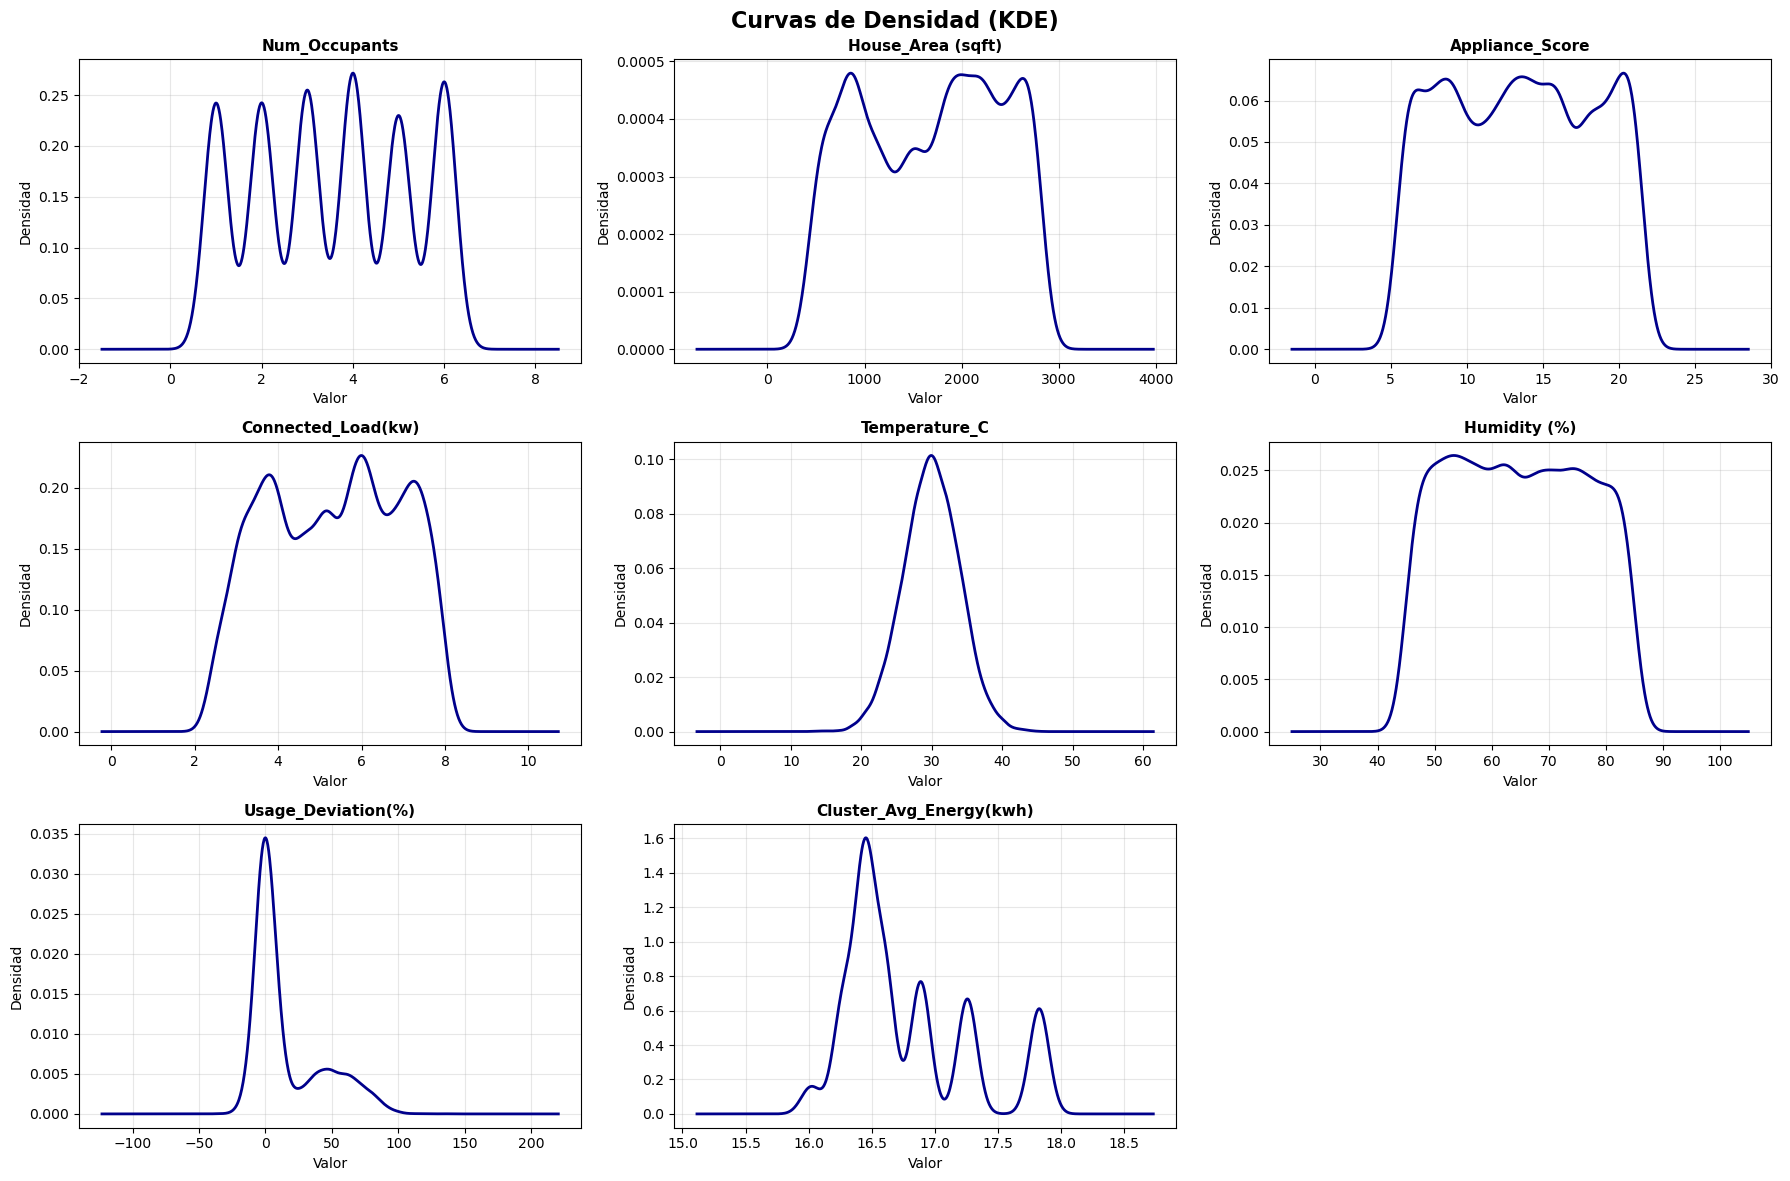

In [57]:
# KDE plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Curvas de Densidad (KDE)', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if col in df.columns:
        df[col].dropna().plot(kind='kde', ax=axes[idx], color='darkblue', linewidth=2)
        axes[idx].set_title(col, fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valor', fontsize=10)
        axes[idx].set_ylabel('Densidad', fontsize=10)
        axes[idx].grid(alpha=0.3)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 7.4 Gráficos de barras para variables categóricas

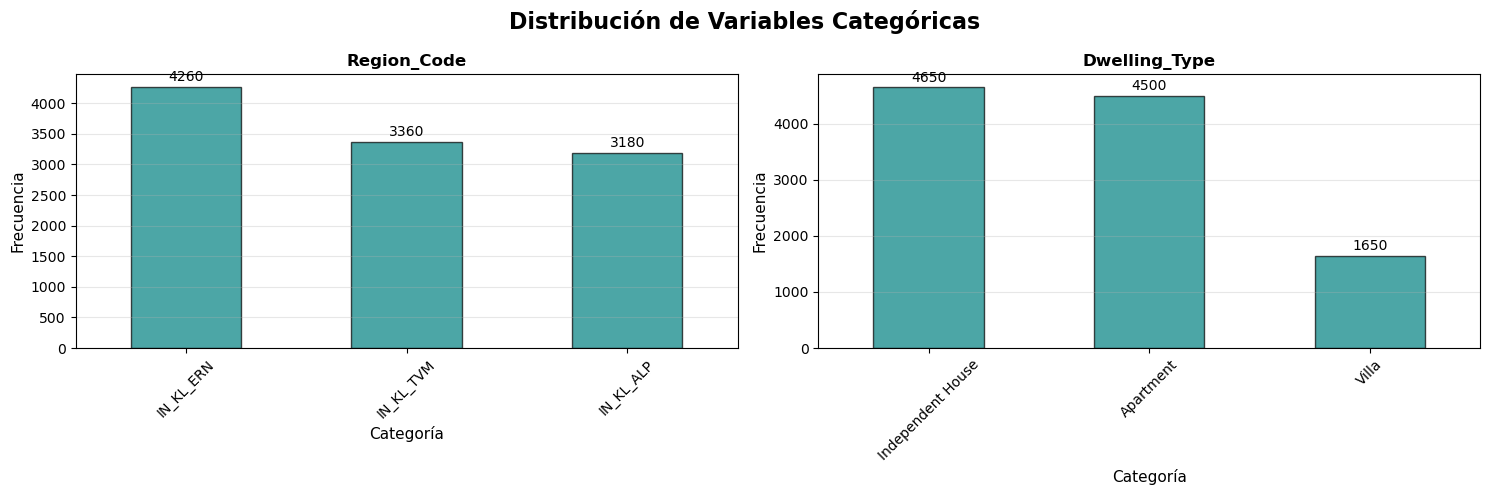

In [58]:
# Gráficos de barras para categóricas (sin incluir Meter_Id y Date)
cat_cols = ['Region_Code', 'Dwelling_Type']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7, edgecolor='black')
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Categoría', fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Agregar valores
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 8. Análisis Multivariable

### 8.1 Matriz de correlación

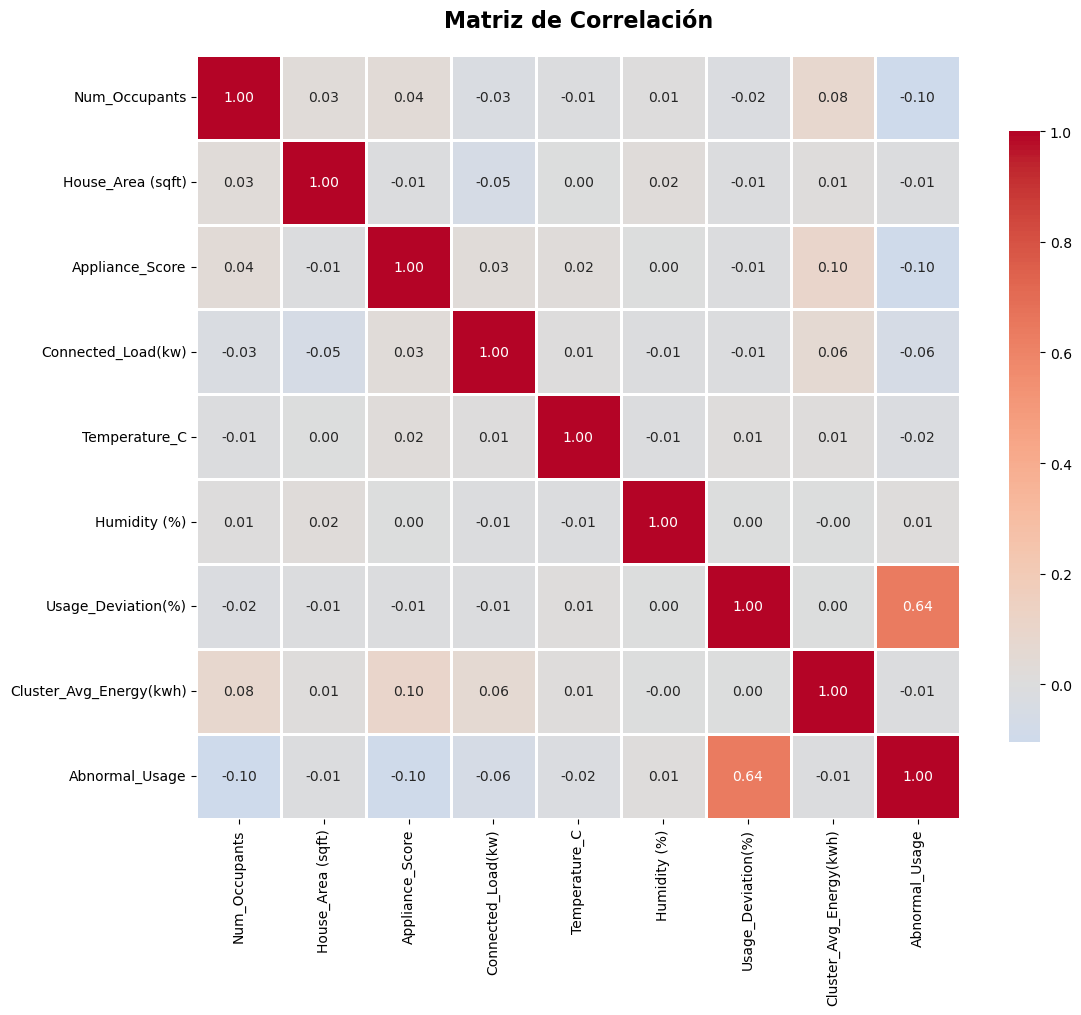

In [59]:
# Calcular matriz de correlación (solo variables numéricas sin problemas)
numeric_df = df[numeric_cols + ['Abnormal_Usage']].copy()
correlation_matrix = numeric_df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlaciones con Abnormal_Usage (ordenadas):
Abnormal_Usage             1.000000
Usage_Deviation(%)         0.636561
Humidity (%)               0.011170
House_Area (sqft)         -0.005086
Cluster_Avg_Energy(kwh)   -0.005340
Temperature_C             -0.017647
Connected_Load(kw)        -0.060889
Appliance_Score           -0.097480
Num_Occupants             -0.104219
Name: Abnormal_Usage, dtype: float64


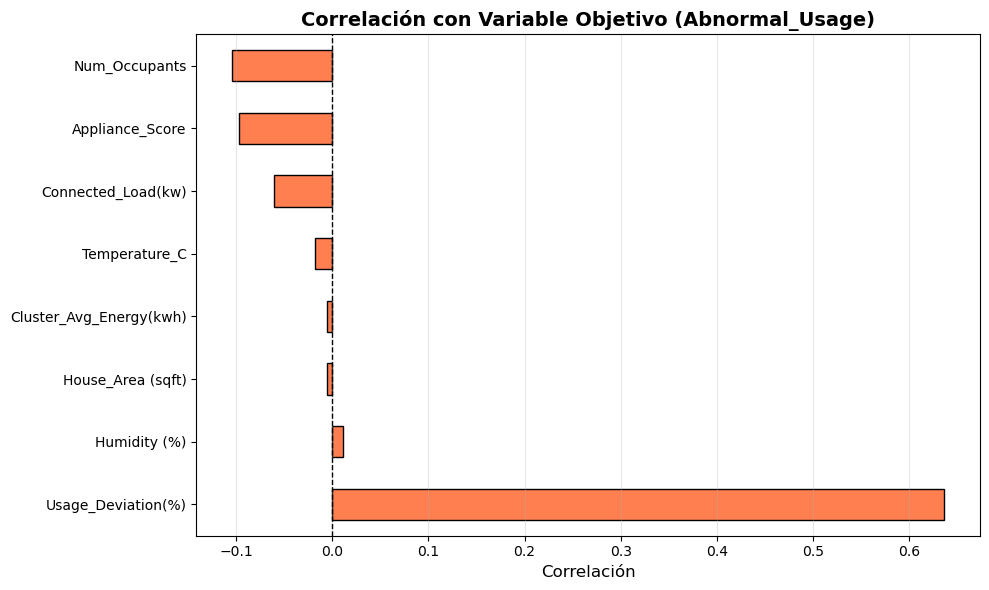

In [60]:
# Correlaciones con la variable objetivo
print("Correlaciones con Abnormal_Usage (ordenadas):")
target_corr = correlation_matrix['Abnormal_Usage'].sort_values(ascending=False)
print(target_corr)

# Visualizar
plt.figure(figsize=(10, 6))
target_corr.drop('Abnormal_Usage').plot(kind='barh', color='coral', edgecolor='black')
plt.title('Correlación con Variable Objetivo (Abnormal_Usage)', fontsize=14, fontweight='bold')
plt.xlabel('Correlación', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 8.2 Pairplot (matriz de dispersión)

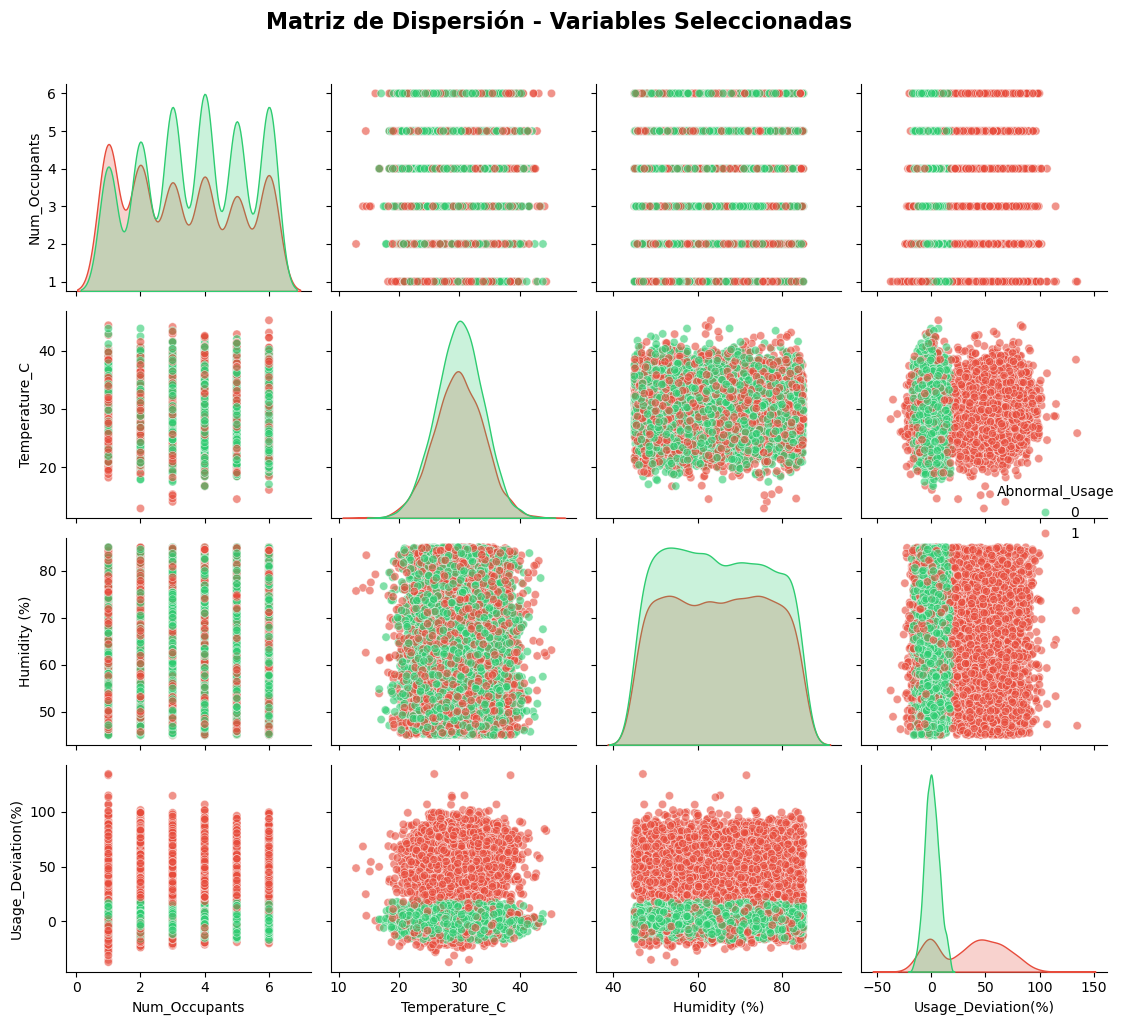

In [61]:
# Seleccionar un subset de variables para el pairplot
subset_cols = ['Num_Occupants', 'Temperature_C', 'Humidity (%)', 
               'Usage_Deviation(%)', 'Abnormal_Usage']

# Crear pairplot
sns.pairplot(df[subset_cols], hue='Abnormal_Usage', palette={0: '#2ecc71', 1: '#e74c3c'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Matriz de Dispersión - Variables Seleccionadas', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 8.3 Análisis por grupos

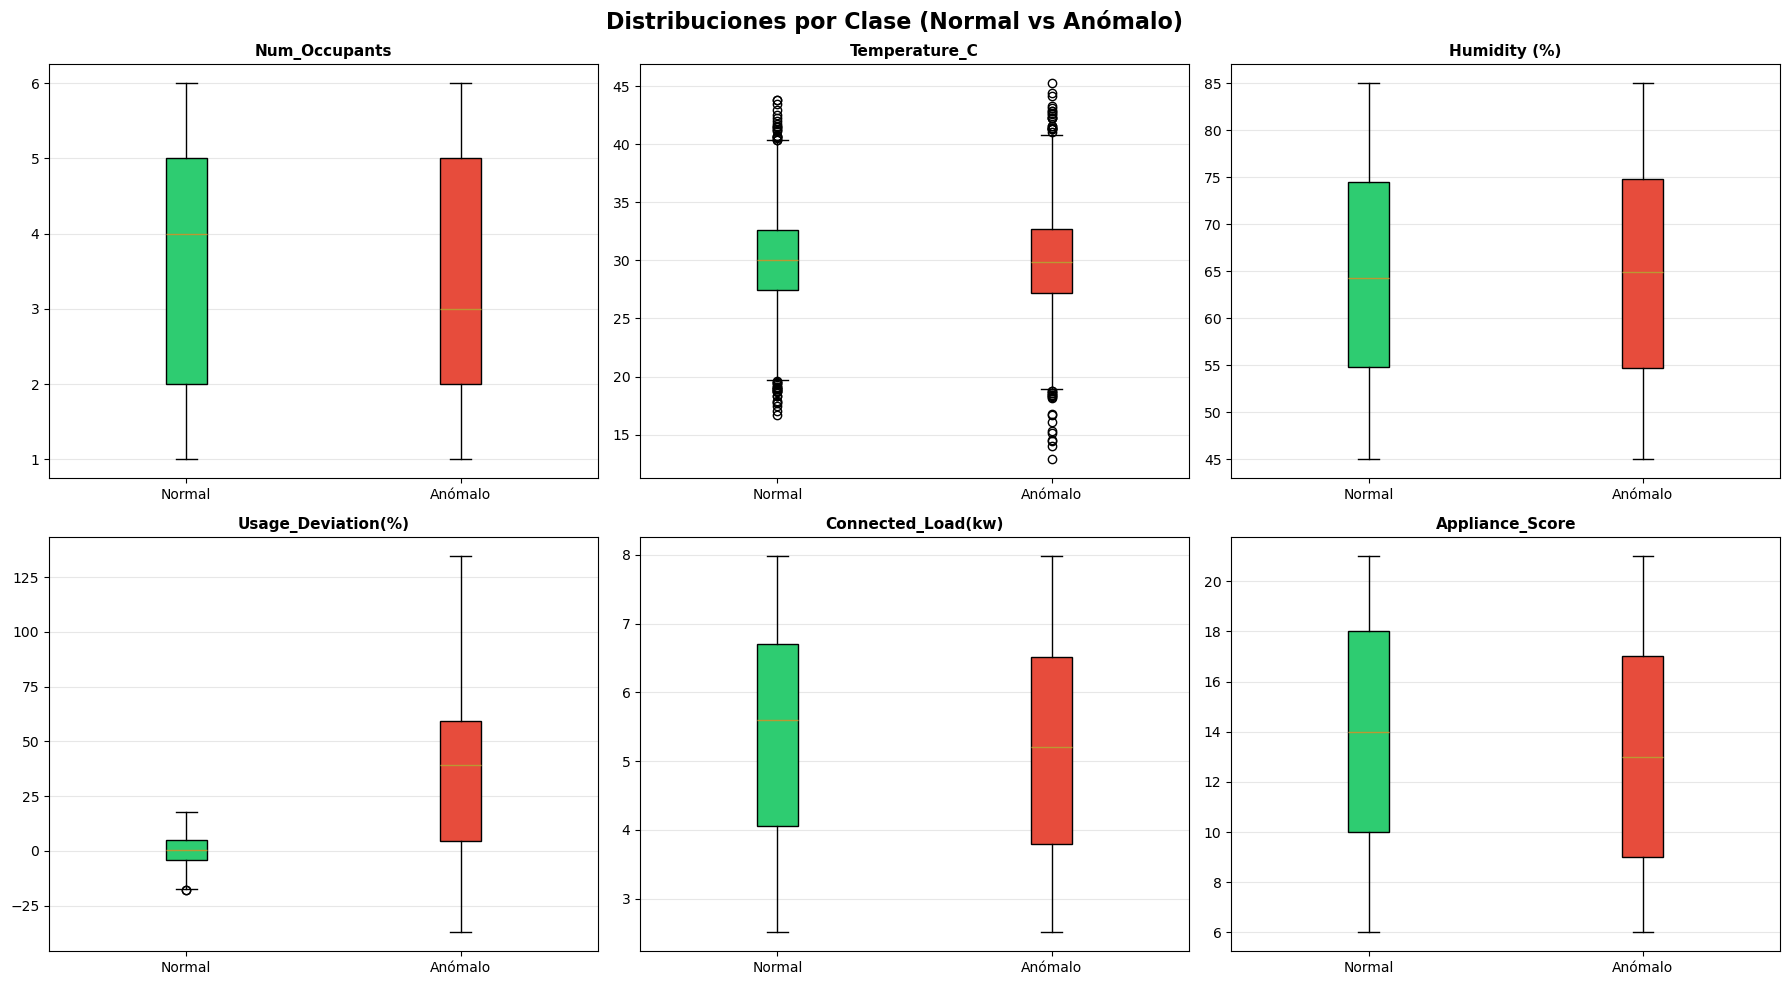

In [31]:
# Comparar distribuciones entre clases normal vs anómalo
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribuciones por Clase (Normal vs Anómalo)', fontsize=16, fontweight='bold')
axes = axes.ravel()

comparison_cols = ['Num_Occupants', 'Temperature_C', 'Humidity (%)', 
                   'Usage_Deviation(%)', 'Connected_Load(kw)', 'Appliance_Score']

for idx, col in enumerate(comparison_cols):
    # Separar por clase
    normal = df[df['Abnormal_Usage'] == 0][col].dropna()
    anomalo = df[df['Abnormal_Usage'] == 1][col].dropna()
    
    # Boxplot comparativo
    data_to_plot = [normal, anomalo]
    bp = axes[idx].boxplot(data_to_plot, labels=['Normal', 'Anómalo'], patch_artist=True)
    
    # Colorear
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    axes[idx].set_title(col, fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Análisis de Valores Duplicados

In [37]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

if duplicados > 0:
    print(f"\nPorcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")
    print("\nEjemplo de filas duplicadas:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\nNo hay filas duplicadas")

Número de filas duplicadas: 0

No hay filas duplicadas


## 10. Detección de Outliers

In [36]:
# Detectar outliers usando IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Detección de Outliers (método IQR):")

outlier_summary = []
for col in numeric_cols:
    if col in df.columns:
        n_outliers, lower, upper = detect_outliers_iqr(df, col)
        pct_outliers = (n_outliers / len(df)) * 100
        outlier_summary.append({
            'Columna': col,
            'N_Outliers': n_outliers,
            'Porcentaje': f"{pct_outliers:.2f}%",
            'Límite_Inferior': f"{lower:.2f}",
            'Límite_Superior': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Detección de Outliers (método IQR):


,Columna,N_Outliers,Porcentaje,Límite_Inferior,Límite_Superior
0,Num_Occupants,0,0.00%,-2.50,9.50
1,House_Area (sqft),0,0.00%,-911.12,4193.88
2,Appliance_Score,0,0.00%,-4.50,31.50
3,Connected_Load(kw),0,0.00%,-0.19,10.78
4,Temperature_C,87,0.81%,19.29,40.66
5,Humidity (%),0,0.00%,25.00,104.41
6,Usage_Deviation(%),135,1.25%,-55.73,86.24
7,Cluster_Avg_Energy(kwh),1290,11.94%,15.60,17.81


## 11. Resumen y Conclusiones del EDA

In [35]:

print("RESUMEN DEL ANÁLISIS EXPLORATORIO")


print(f"\n1. DIMENSIONES:")
print(f"   - Filas: {df.shape[0]:,}")
print(f"   - Columnas: {df.shape[1]}")

print(f"\n2. VALORES FALTANTES:")
missing_total = df.isnull().sum().sum()
print(f"   - Total: {missing_total:,}")
if missing_total > 0:
    print(f"   - Columnas afectadas: {df.isnull().sum()[df.isnull().sum() > 0].index.tolist()}")

print(f"\n3. DUPLICADOS:")
print(f"   - Filas duplicadas: {df.duplicated().sum()}")

print(f"\n4. VARIABLE OBJETIVO:")
print(f"   - Balance: {target_pct[0]:.2f}% Normal / {target_pct[1]:.2f}% Anómalo")

print(f"\n5. VARIABLES CATEGÓRICAS:")
print(f"   - Regiones: {df['Region_Code'].nunique()}")
print(f"   - Tipos de vivienda: {df['Dwelling_Type'].nunique()}")

print(f"\n6. PROBLEMAS DETECTADOS:")
print(f"   - Expected_Energy y Actual_Energy en formato string")
print(f"   - Valores faltantes en columnas de energía")
print(f"   - Fecha en formato string (requiere conversión)")



RESUMEN DEL ANÁLISIS EXPLORATORIO

1. DIMENSIONES:
   - Filas: 10,800
   - Columnas: 15

2. VALORES FALTANTES:
   - Total: 1,567
   - Columnas afectadas: ['Expected_Energy(kwh)', 'Actual_Energy(kwh)']

3. DUPLICADOS:
   - Filas duplicadas: 0

4. VARIABLE OBJETIVO:
   - Balance: 56.12% Normal / 43.88% Anómalo

5. VARIABLES CATEGÓRICAS:
   - Regiones: 3
   - Tipos de vivienda: 3

6. PROBLEMAS DETECTADOS:
   - Expected_Energy y Actual_Energy en formato string
   - Valores faltantes en columnas de energía
   - Fecha en formato string (requiere conversión)


## 12. Próximos Pasos

**Tareas pendientes para la limpieza de datos:**

1. **Limpiar columnas de energía:**
   - Remover " kWh" de Expected_Energy y Actual_Energy
   - Convertir a tipo float

2. **Manejar valores faltantes:**
   - Decidir estrategia: imputación o eliminación
   - Aplicar técnica seleccionada

3. **Convertir fechas:**
   - Transformar Date a formato datetime
   - Extraer features temporales si es necesario

4. **Codificar variables categóricas:**
   - Region_Code: Label Encoding o One-Hot
   - Dwelling_Type: One-Hot Encoding

5. **Manejar outliers:**
   - Evaluar si eliminar o transformar
   - Considerar impacto en el modelo

6. **Normalización/Escalado:**
   - StandardScaler o MinMaxScaler
   - Aplicar después de train/test split


**Fin del EDA - Dataset Anomalías**